In [1]:
library(dplyr)
library(tidyr)
library(readr) 
library(caret)
library(ggplot2)
library(GGally)
library(tidyverse)
library(repr)
library(infer)
library(cowplot)
library(broom)
library(GGally)
library(modelr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: ggplot2

Loading required package: lattice

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ purrr::lift()   masks caret::lift()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp



Attaching package: ‘modelr’


The following object is masked fr

## 1. **Data Description** 

The heart disease dataset originates from the UCI Machine Learning Repository and is compiled from four medical institutions：
- Cleveland Clinic Foundation
    <br>
- Hungarian Institute of Cardiology, Budapest
    <br>
- V.A. Medical Center, Long Beach, CA
    <br>
- University Hospital, Zurich, Switzerland
<br>
The dataset consists of 303 observations and 14 attributes, including patient demographics, clinical features, and the presence of heart disease. The data was collected through clinical trials and medical examinations aimed at diagnosing and understanding heart disease. The primary purpose of the dataset is to enable the development of predictive models and perform statistical analysis to better understand the factors contributing to heart disease.

Among many variables available, we will use the following:
1. `age`: age in years
2. `sex`: sex 
    * 1 = male
    * 0 = female
3. `cp`: chest pain type
    * Value 1: typical angina
    * Value 2: atypical angina
    * Value 3: non-anginal pain
    * Value 4: asymptomatic
4. `trestbps`: resting blood pressure (in mm Hg on admission to the hospital)
5. `chol`: serum cholestoral in mg/dl
6. `fbs`: (fasting blood sugar > 120 mg/dl) 
    * 1 = true; 
    * 0 = false
7. `restecg`: resting electrocardiographic results
    * Value 0: normal
    * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. `thalach`: maximum heart rate achieved
9. `exang`: exercise induced angina 
    * 1 = yes
    * 0 = no
10. `oldpeak` = ST depression induced by exercise relative to rest
11. `slope`: the slope of the peak exercise ST segment
    * Value 1: upsloping
    * Value 2: flat
    * Value 3: downsloping
12. `ca`: number of major vessels (0-3) colored by flourosopy
13. `thal`: 
    * 3 = normal 
    * 6 = fixed defect
    * 7 = reversable defect 
14. `num` :Diagnosis of heart disease (angiographic disease status)
Value 0: < 50% diameter narrowing ,
Value 1: > 50% diameter narrowing   
    * 0 = No presence of heart disease (< 50% diameter narrowing),
    * 1 = Presence of heart disease (> 50% diameter narrowing),
    * 2 = Presence of heart disease with more severe narrowing,
    * 3 = Presence of heart disease with even more severe narrowing,
    * 4 = Presence of heart disease with the most severe narrowing
---    

## 2. **Question**

The question I will try to answer using the selected heart disease dataset is: **"How do various clinical factors affect the presence of heart disease?"** The response variable of interest is the diagnosis of heart disease (`Num`), which indicates whether a patient has heart disease (presence) or not (absence). The explanatory variables include age, sex, chest pain type (`CP`), resting blood pressure (`Trestbps`), serum cholesterol (`Chol`), fasting blood sugar (`Fbs`), resting electrocardiographic results (`Restecg`), maximum heart rate achieved (`Thalach`), exercise-induced angina (`Exang`), ST depression induced by exercise relative to rest (`Oldpeak`), the slope of the peak exercise ST segment (`Slope`), the number of major vessels colored by fluoroscopy (`Ca`), and thalassemia (`Thal`). By analyzing these variables, I aim to understand the relationship between these factors and the likelihood of having heart disease. This question is focused on inference.  Inference aims to understand the significance and impact of each factor on the presence of heart disease.

## 3.Exploratory Data Analysis and Visualization

### 3.1 Load data

In [2]:
data <- read.csv("processed.cleveland.data", header=FALSE)

head(data)

V1 V2 V3 V4  V5  V6 V7 V8  V9 V10 V11 V12 V13 V14
1 63 1  1  145 233 1  2  150 0  2.3 3   0.0 6.0 0  
2 67 1  4  160 286 0  2  108 1  1.5 2   3.0 3.0 2  
3 67 1  4  120 229 0  2  129 1  2.6 2   2.0 7.0 1  
4 37 1  3  130 250 0  0  187 0  3.5 3   0.0 3.0 0  
5 41 0  2  130 204 0  2  172 0  1.4 1   0.0 3.0 0  
6 56 1  2  120 236 0  0  178 0  0.8 1   0.0 3.0 0

### 3.2 Cleaning and Wrangling Data

In [3]:
colnames(data) <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", 
                 "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")

#since the response vaiable has 4 levels, so we convert  the num variable from a multi-level categorical variable (with levels 0, 1, 2, 3, 4) into a binary variable
data <- data %>%
  mutate(num = if_else(num == 0, "No", "Yes"))

data <- data %>%
  mutate(ca = as.numeric(replace(ca, ca == "?", NA)),
         thal = as.numeric(replace(thal, thal == "?", NA)))

data <- data %>%
  mutate(ca = ifelse(is.na(ca), median(ca, na.rm = TRUE), ca),
         thal = ifelse(is.na(thal), median(thal, na.rm = TRUE), thal))
         
data <- data %>%
   mutate(sex = as.factor(sex),
         cp = as.factor(cp),
         fbs = as.factor(fbs),
         restecg = as.factor(restecg),
         exang = as.factor(exang),
         slope = as.factor(slope),
         ca = as.factor(ca),
         thal = as.factor(thal),
         num = as.factor(num))


head(data)

age sex cp trestbps chol fbs restecg thalach exang oldpeak slope ca thal num
1 63  1   1  145      233  1   2       150     0     2.3     3     0  6    No 
2 67  1   4  160      286  0   2       108     1     1.5     2     3  3    Yes
3 67  1   4  120      229  0   2       129     1     2.6     2     2  7    Yes
4 37  1   3  130      250  0   0       187     0     3.5     3     0  3    No 
5 41  0   2  130      204  0   2       172     0     1.4     1     0  3    No 
6 56  1   2  120      236  0   0       178     0     0.8     1     0  3    No

***After coverting, the response variable `num` become the binary varibale***

In [4]:
str(data)

'data.frame':	303 obs. of  14 variables:
 $ age     : num  63 67 67 37 41 56 62 57 63 53 ...
 $ sex     : Factor w/ 2 levels "0","1": 2 2 2 2 1 2 1 1 2 2 ...
 $ cp      : Factor w/ 4 levels "1","2","3","4": 1 4 4 3 2 2 4 4 4 4 ...
 $ trestbps: num  145 160 120 130 130 120 140 120 130 140 ...
 $ chol    : num  233 286 229 250 204 236 268 354 254 203 ...
 $ fbs     : Factor w/ 2 levels "0","1": 2 1 1 1 1 1 1 1 1 2 ...
 $ restecg : Factor w/ 3 levels "0","1","2": 3 3 3 1 3 1 3 1 3 3 ...
 $ thalach : num  150 108 129 187 172 178 160 163 147 155 ...
 $ exang   : Factor w/ 2 levels "0","1": 1 2 2 1 1 1 1 2 1 2 ...
 $ oldpeak : num  2.3 1.5 2.6 3.5 1.4 0.8 3.6 0.6 1.4 3.1 ...
 $ slope   : Factor w/ 3 levels "1","2","3": 3 2 2 3 1 1 3 1 2 3 ...
 $ ca      : Factor w/ 4 levels "0","1","2","3": 1 4 3 1 1 1 3 1 2 1 ...
 $ thal    : Factor w/ 3 levels "3","6","7": 2 1 3 1 1 1 1 1 3 3 ...
 $ num     : Factor w/ 2 levels "No","Yes": 1 2 2 1 1 1 2 1 2 2 ...


In [121]:
colSums(is.na(data))

age      sex       cp trestbps     chol      fbs  restecg  thalach 
       0        0        0        0        0        0        0        0 
   exang  oldpeak    slope       ca     thal      num 
       0        0        0        0        0        0

In [122]:
dim(data)
summary(data)

[1] 303  14

      age        sex     cp         trestbps          chol       fbs    
 Min.   :29.00   0: 97   1: 23   Min.   : 94.0   Min.   :126.0   0:258  
 1st Qu.:48.00   1:206   2: 50   1st Qu.:120.0   1st Qu.:211.0   1: 45  
 Median :56.00           3: 86   Median :130.0   Median :241.0          
 Mean   :54.44           4:144   Mean   :131.7   Mean   :246.7          
 3rd Qu.:61.00                   3rd Qu.:140.0   3rd Qu.:275.0          
 Max.   :77.00                   Max.   :200.0   Max.   :564.0          
 restecg    thalach      exang      oldpeak     slope   ca      thal    num    
 0:151   Min.   : 71.0   0:204   Min.   :0.00   1:142   0:180   3:168   0:164  
 1:  4   1st Qu.:133.5   1: 99   1st Qu.:0.00   2:140   1: 65   6: 18   1:139  
 2:148   Median :153.0           Median :0.80   3: 21   2: 38   7:117          
         Mean   :149.6           Mean   :1.04           3: 20                  
         3rd Qu.:166.0           3rd Qu.:1.60                                  
         

### 3.3 Proposed Visualization

To explore the dataset and address the question of interest, I propose using corrleation matrix，heatmap histograms for numerical variables and bar plots for categorical variables. These plots will help us understand the distribution of each covariates and response variable, and their potential relationship with the presence of heart disease. I also use the `ggpairs` which is a good plot , because it shows plots and correlation index of the association of numerical variables with the response and other covariates, it can be useful to check for collinearity.

In [123]:
corr_matrix_heart_disease <- 
    data %>%
    select(age,trestbps,chol,thalach,oldpeak) %>% 
    cor() %>%
    as_tibble(rownames = 'var1') %>%
    pivot_longer(-var1, names_to = "var2", values_to = "corr")
corr_matrix_heart_disease

var1     var2     corr        
1  age      age       1.000000000
2  age      trestbps  0.284945919
3  age      chol      0.208950270
4  age      thalach  -0.393805806
5  age      oldpeak   0.203805481
6  trestbps age       0.284945919
7  trestbps trestbps  1.000000000
8  trestbps chol      0.130120108
9  trestbps thalach  -0.045350879
10 trestbps oldpeak   0.189170971
11 chol     age       0.208950270
12 chol     trestbps  0.130120108
13 chol     chol      1.000000000
14 chol     thalach  -0.003431832
15 chol     oldpeak   0.046563989
16 thalach  age      -0.393805806
17 thalach  trestbps -0.045350879
18 thalach  chol     -0.003431832
19 thalach  thalach   1.000000000
20 thalach  oldpeak  -0.343085392
21 oldpeak  age       0.203805481
22 oldpeak  trestbps  0.189170971
23 oldpeak  chol      0.046563989
24 oldpeak  thalach  -0.343085392
25 oldpeak  oldpeak   1.000000000

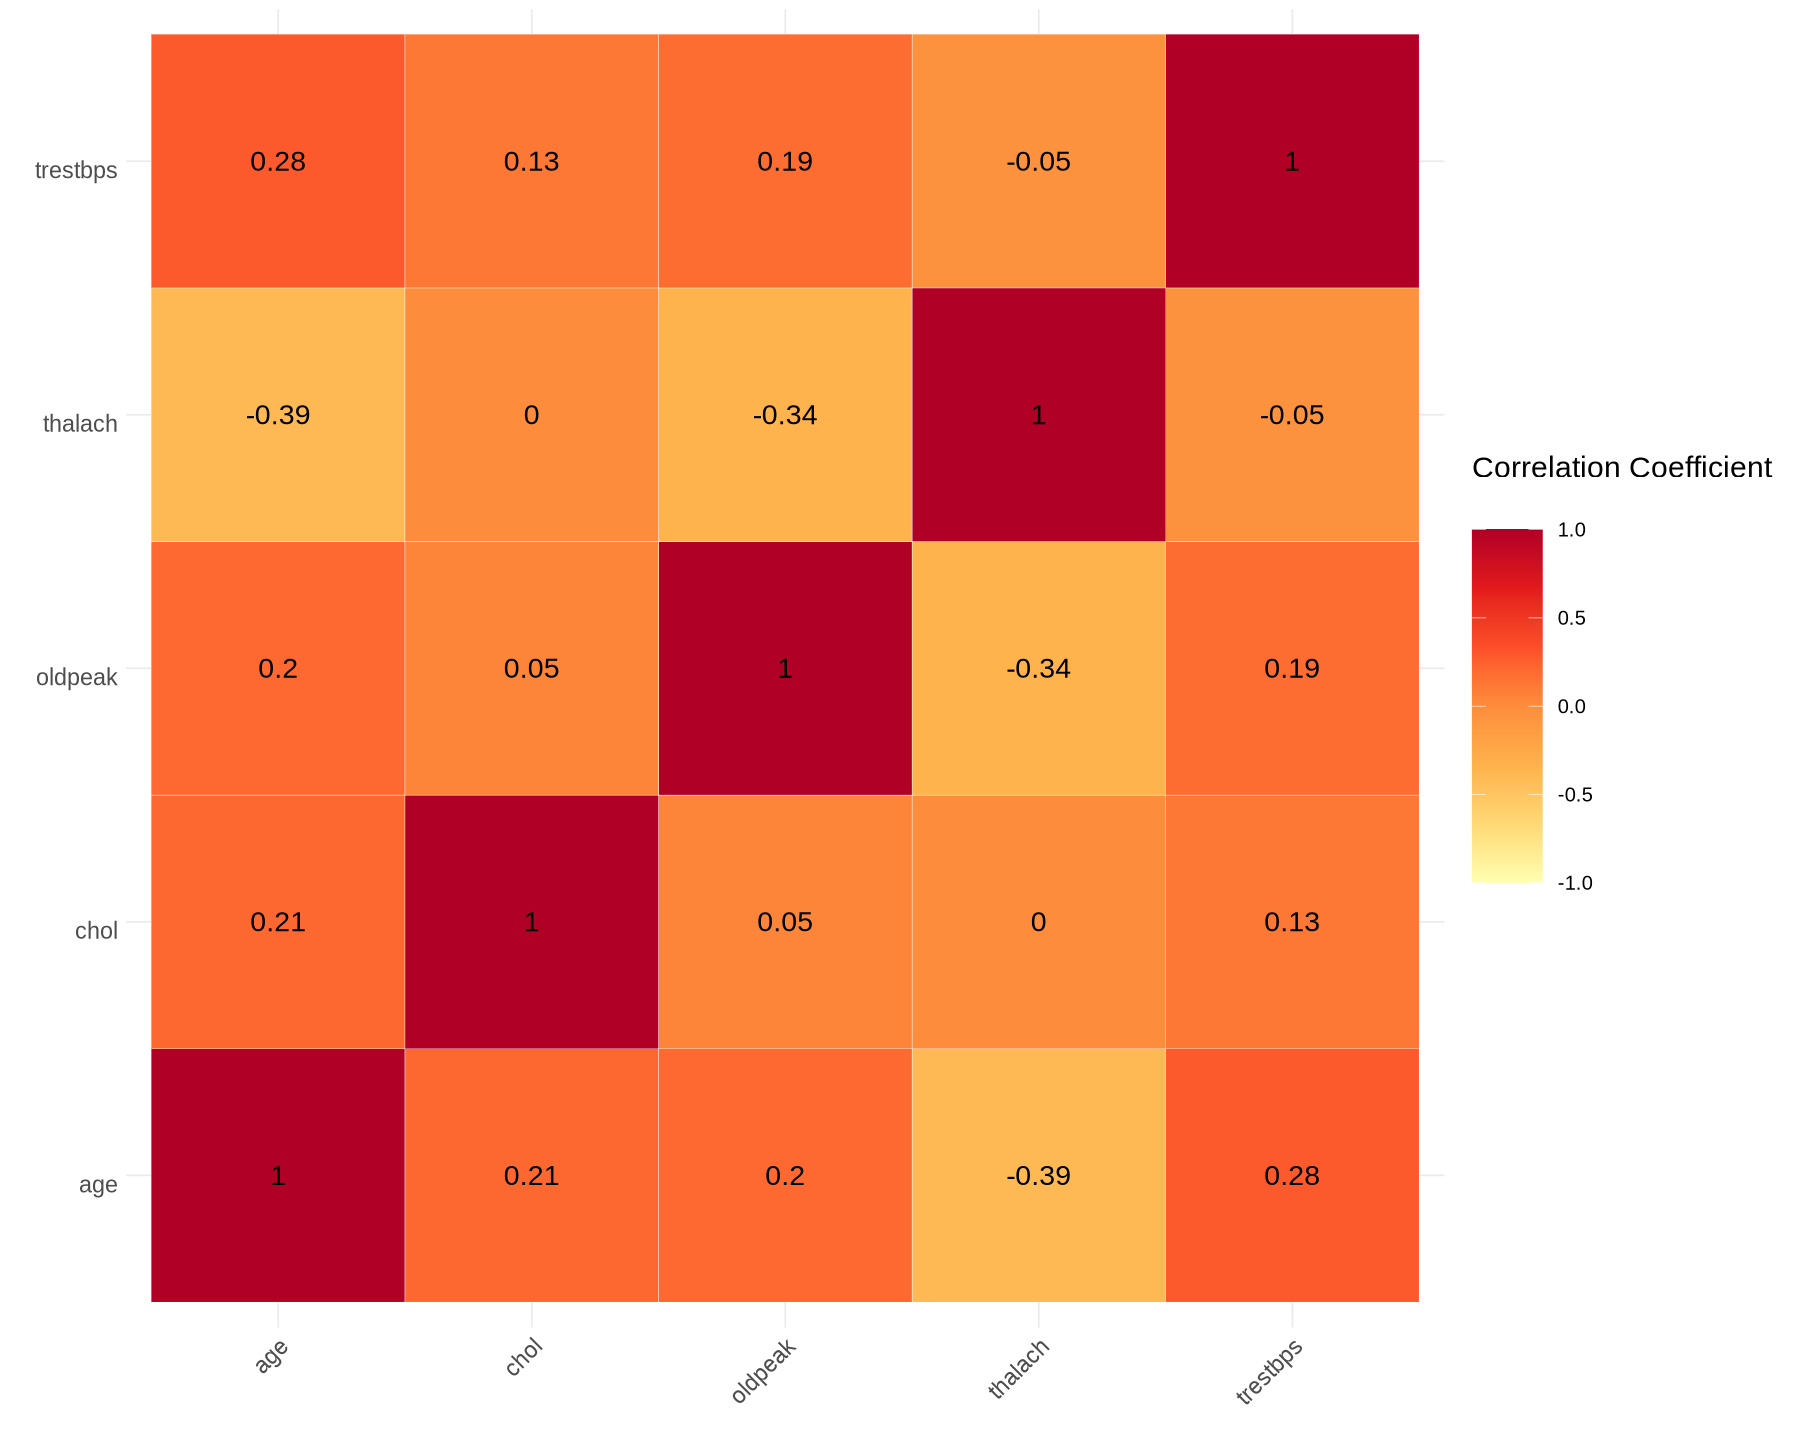

In [124]:
plot_corr_matrix_heart_disease <- 
   corr_matrix_heart_disease %>%
   ggplot(aes(var1, var2)) +
   geom_tile(aes(fill = corr), color = "white") +
   scale_fill_distiller("Correlation Coefficient \n",
       palette =  "YlOrRd",
       direction = 1, 
       limits = c(-1,1)
     ) +
     labs(x = "", y = "") +
     theme_minimal() +
     theme(
         axis.text.x = element_text(angle = 45, vjust = 1, size = 14, hjust = 1),
         axis.text.y = element_text(vjust = 1, size = 14, hjust = 1),
         legend.title = element_text(size = 18),
         legend.text = element_text(size = 12),
         legend.key.size = unit(1.5, "cm")
     ) +
     coord_fixed() +
    geom_text(aes(var1, var2, label = round(corr, 2)), color = "black", size = 6)
plot_corr_matrix_heart_disease

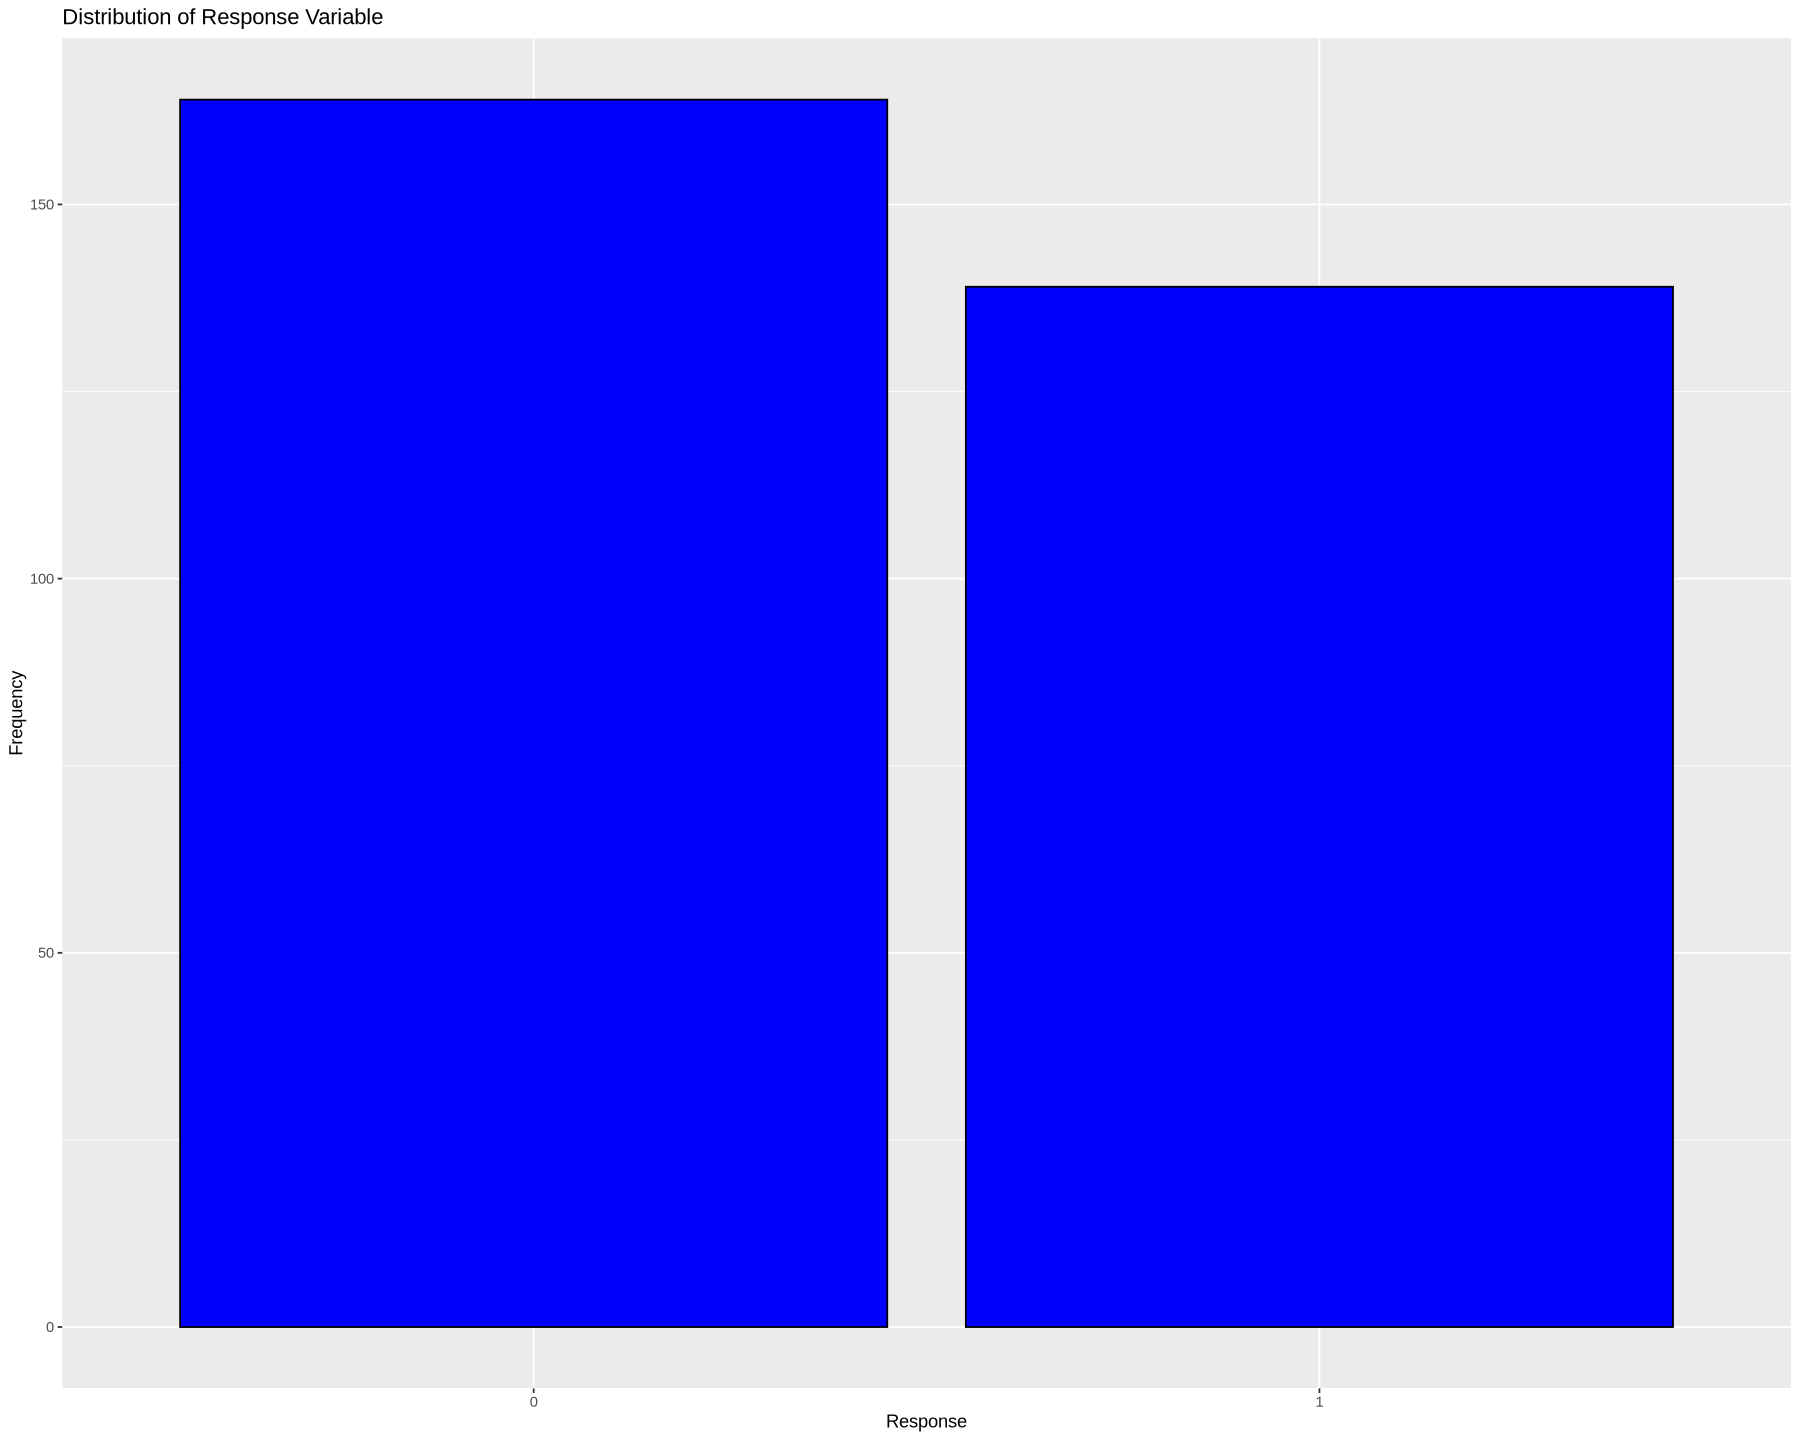

In [125]:
ggplot(data, aes(x = num)) +
geom_bar(fill = "blue", color = "black", stat = "count") +
labs(title = "Distribution of Response Variable", x = "Response", y = "Frequency")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwid

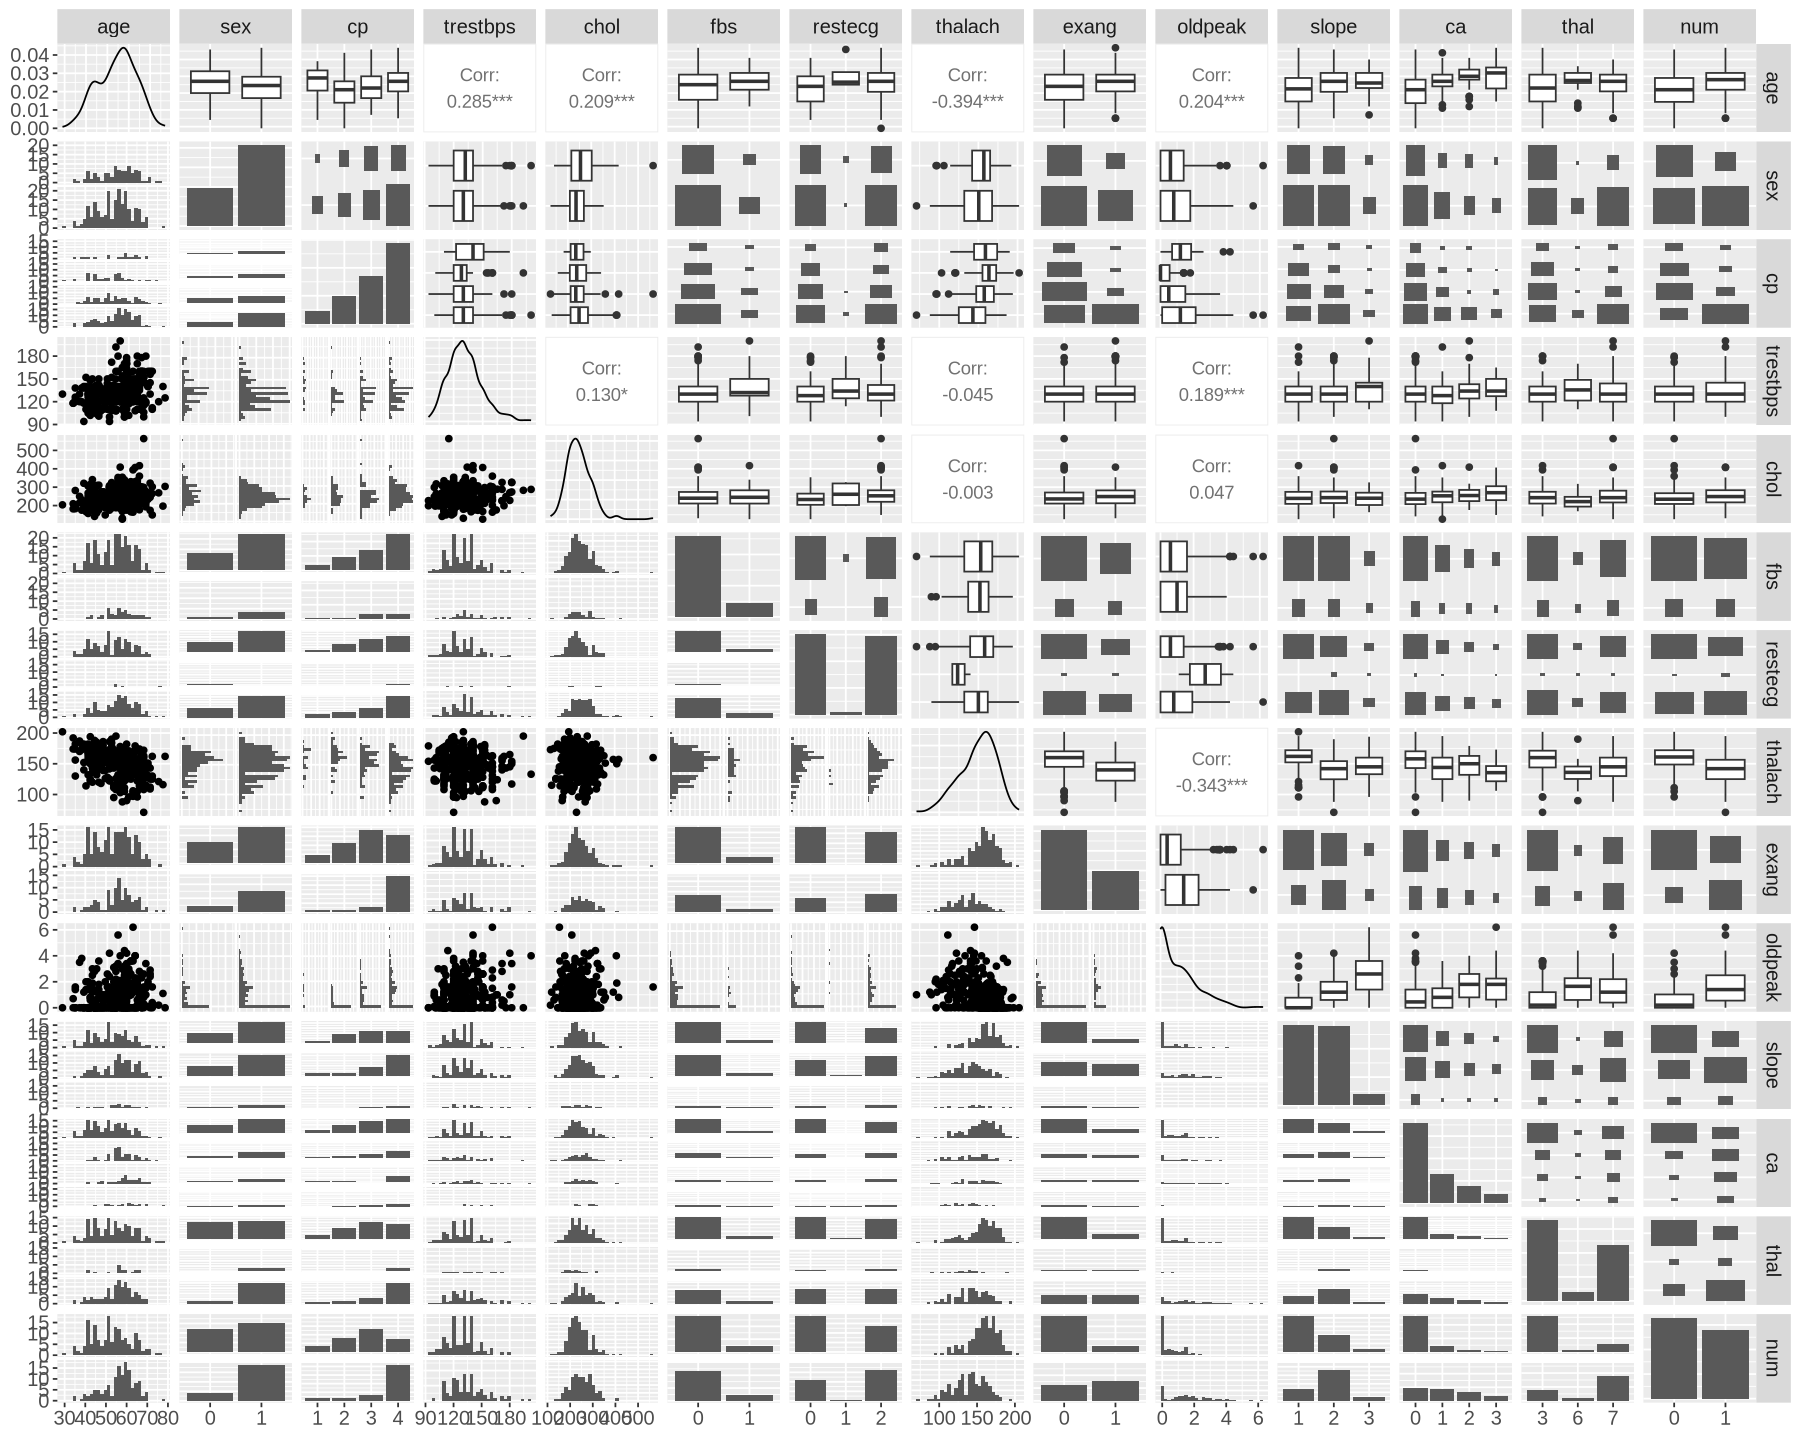

In [126]:
options(repr.plot.width = 15, repr.plot.height = 12) 
heart_disease_pair_plots <- 
   data %>%
   ggpairs(progress = FALSE) +
   theme(
     text = element_text(size = 15),
     plot.title = element_text(face = "bold"),
     axis.title = element_text(face = "bold")
   )
heart_disease_pair_plots

#### 3.3.1 Histograms provide a sense of the distribution and range of numerical variables, highlighting potential outliers and the central tendency

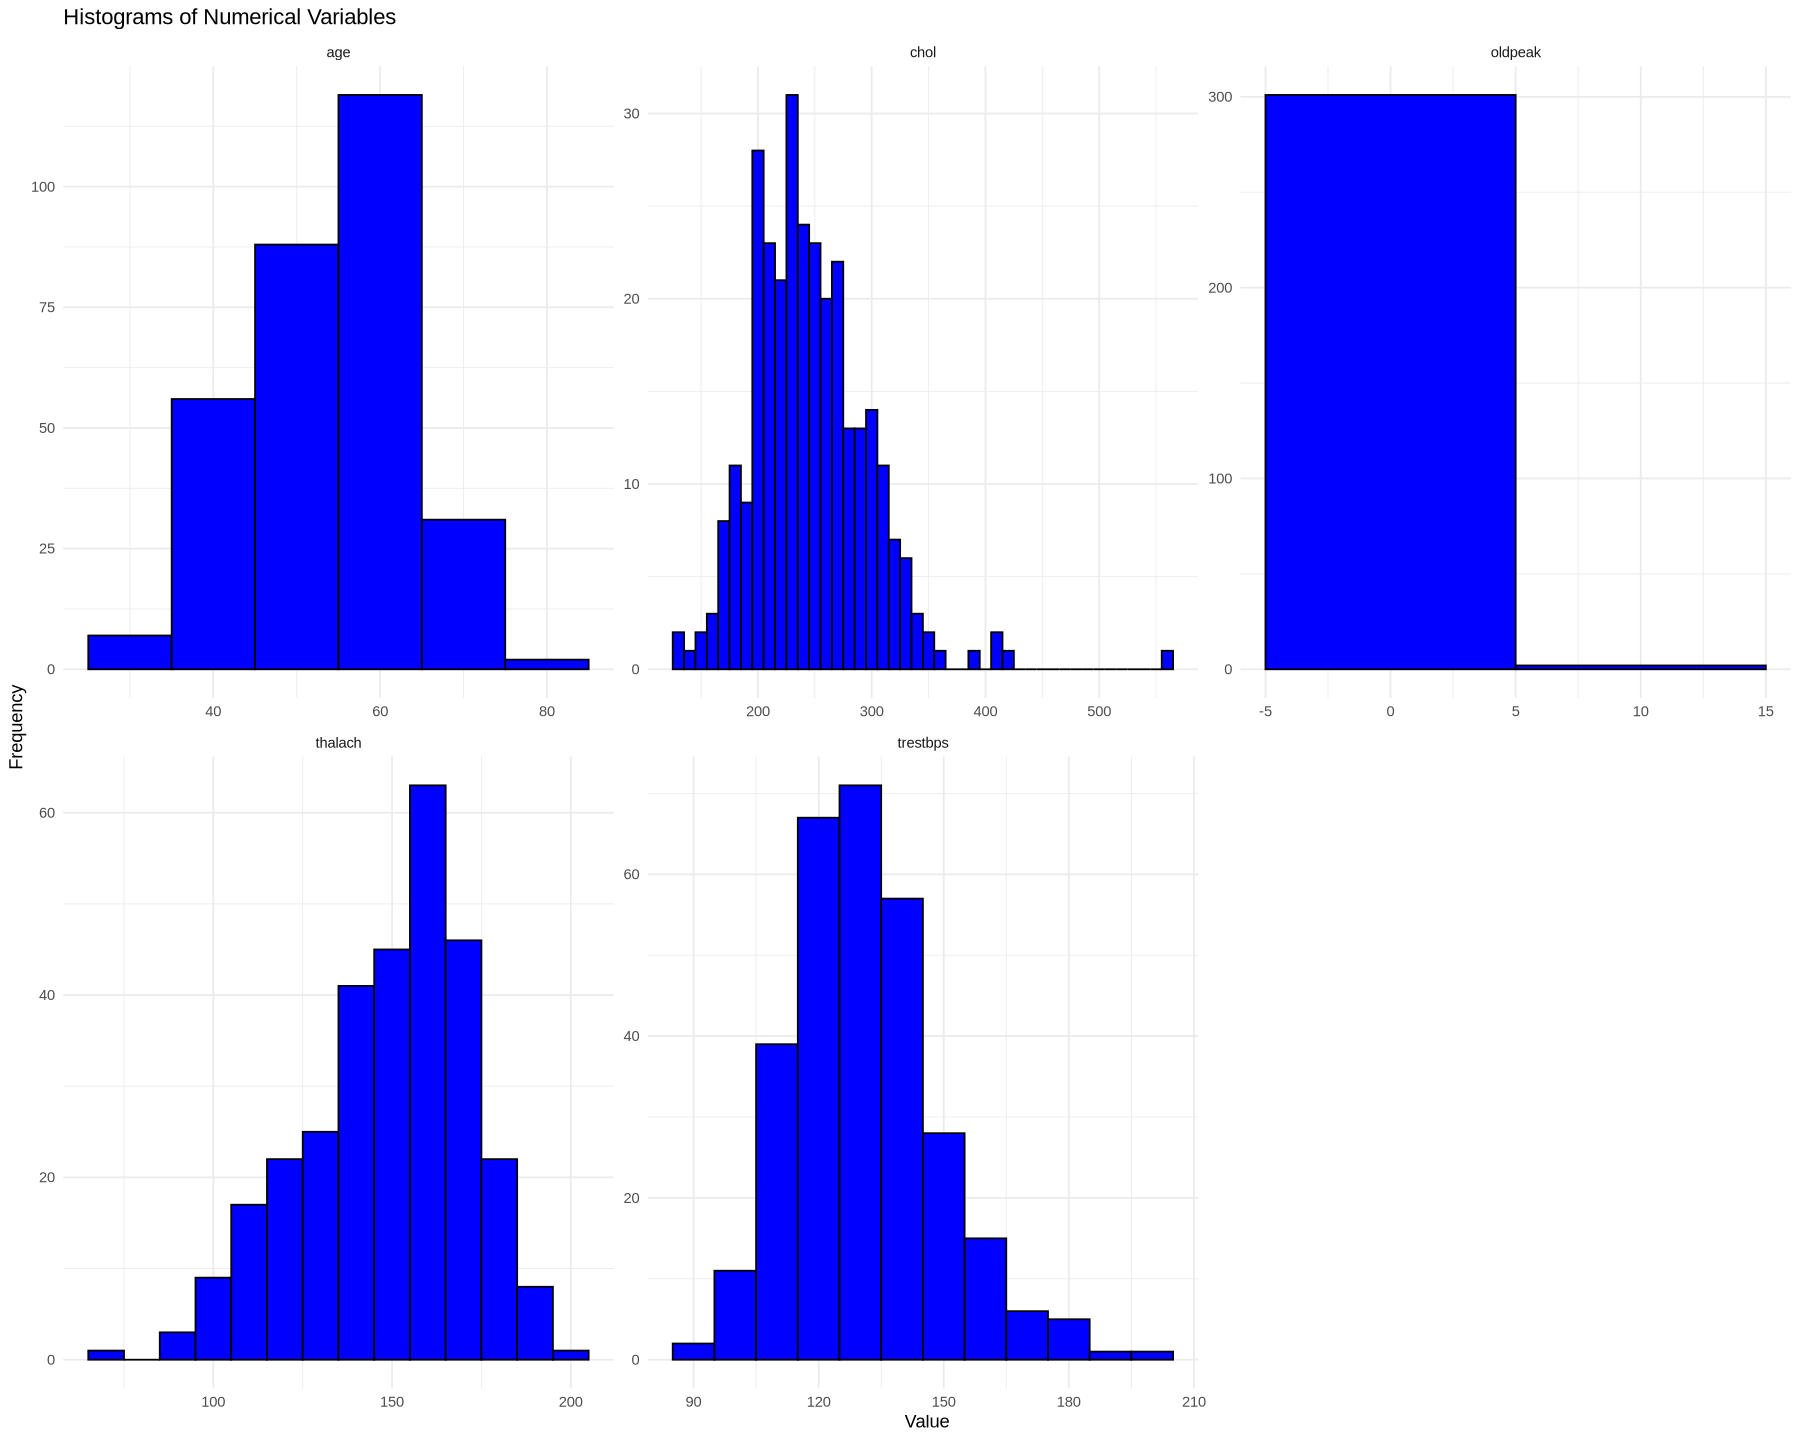

In [127]:
# Histograms of numerical variables
data %>%
  select(age, trestbps, chol, thalach, oldpeak) %>%
  gather(key = "Variable", value = "Value") %>%
  ggplot(aes(x = Value)) +
  geom_histogram(binwidth = 10, fill = "blue", color = "black") +
  facet_wrap(~ Variable, scales = "free") +
  theme_minimal() +
  labs(title = "Histograms of Numerical Variables", x = "Value", y = "Frequency")

#### 3.3.1 Bar plots show the frequency distribution of categorical variables, helping to identify common categories and potential imbalances in the data.

Warning message:
“attributes are not identical across measure variables; they will be dropped”


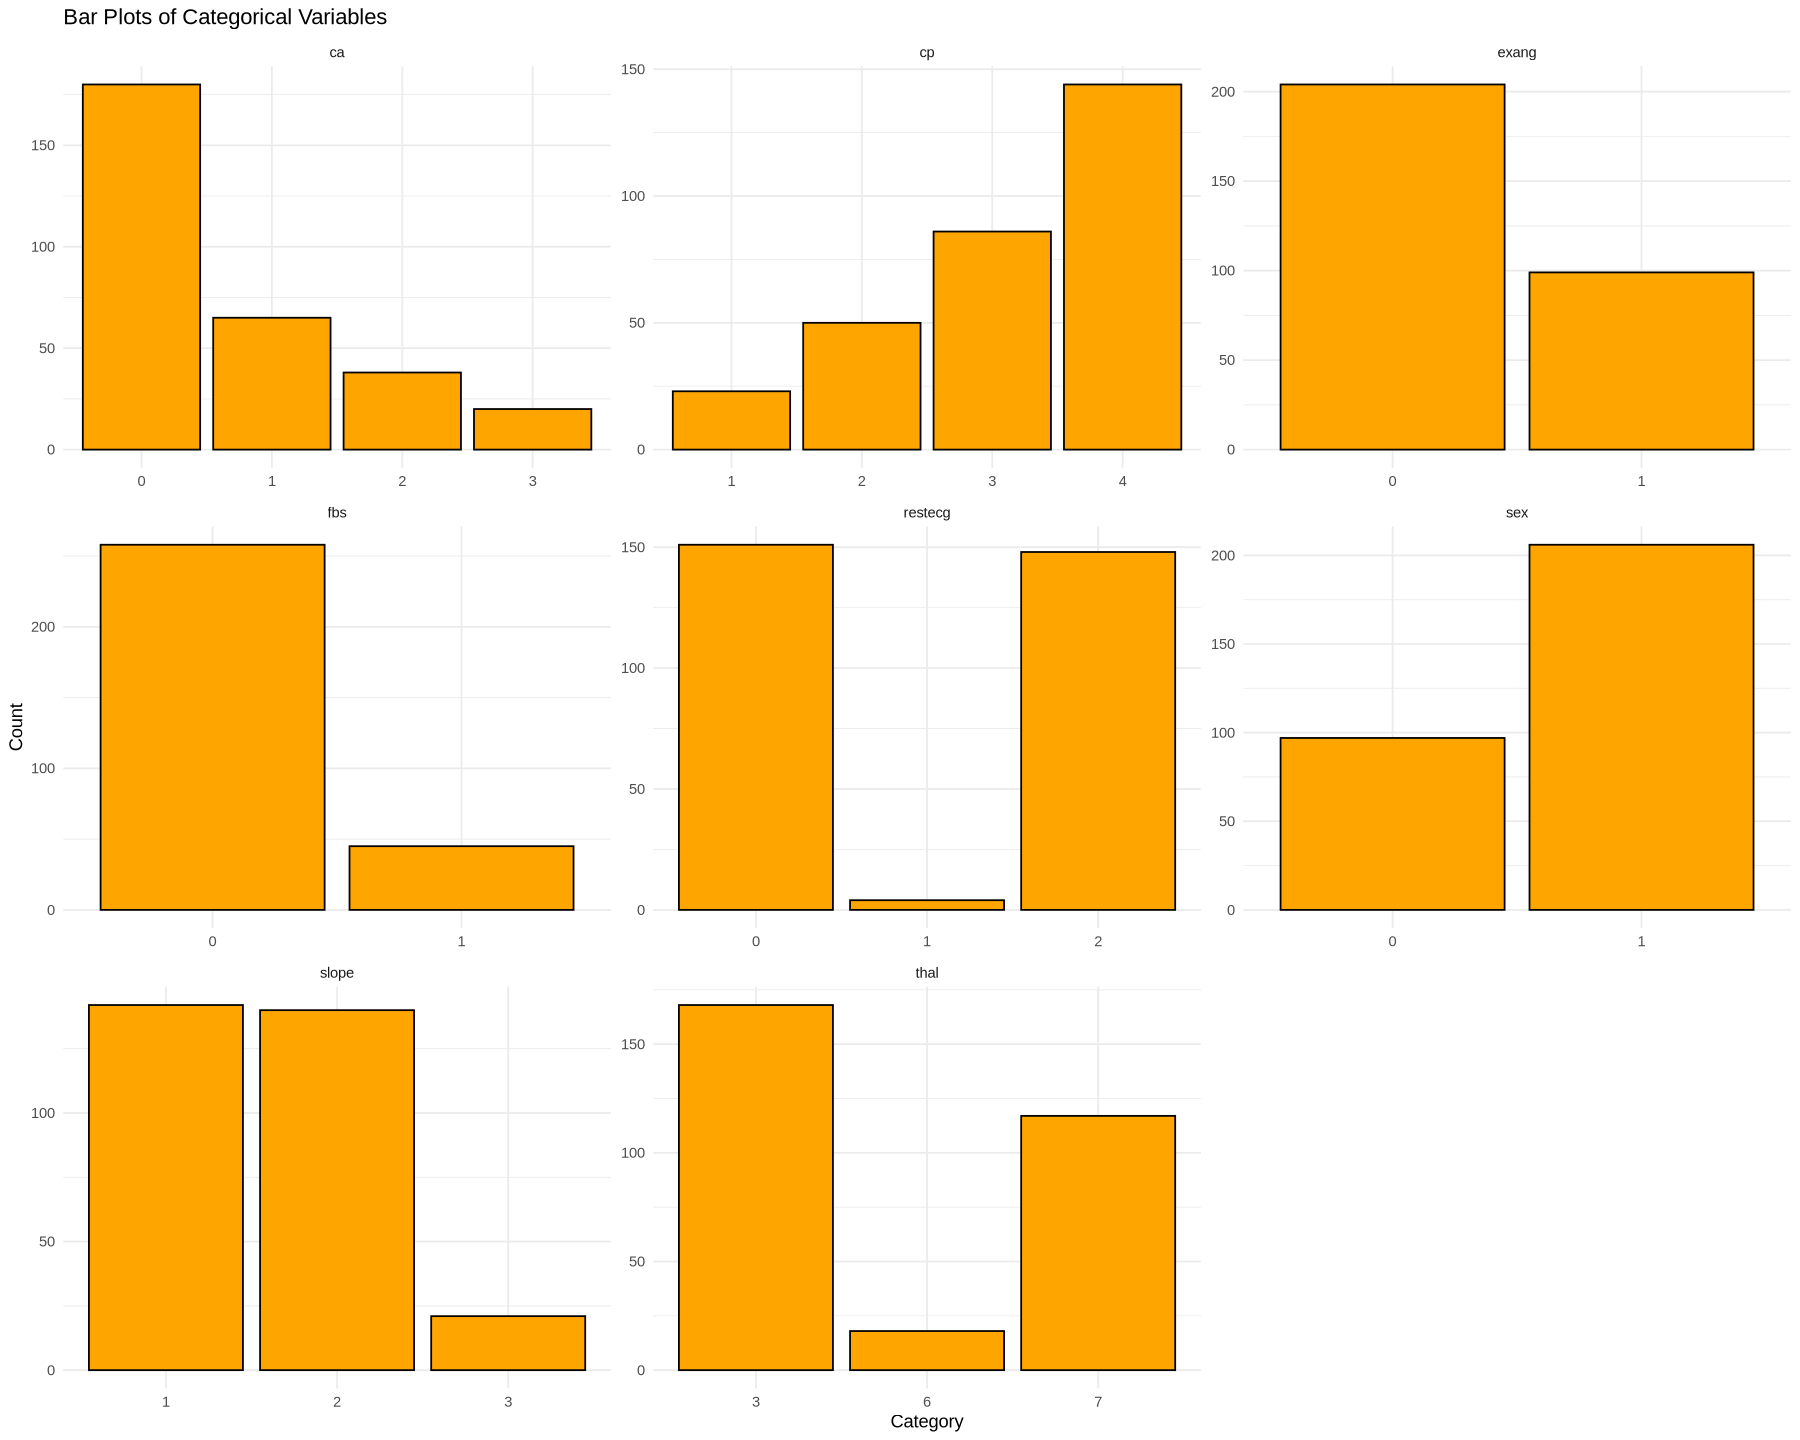

In [128]:
# Bar plots of categorical variables
data %>%
  select(sex, cp, fbs, restecg, exang, slope, ca, thal) %>%
  gather(key = "Variable", value = "Value") %>%
  ggplot(aes(x = as.factor(Value))) +
  geom_bar(fill = "orange", color = "black") +
  facet_wrap(~ Variable, scales = "free") +
  theme_minimal() +
  labs(title = "Bar Plots of Categorical Variables", x = "Category", y = "Count")

#### 3.3.1 Box plots illustrate how the numerical variables differ between patients with and without heart disease, highlighting any significant differences.

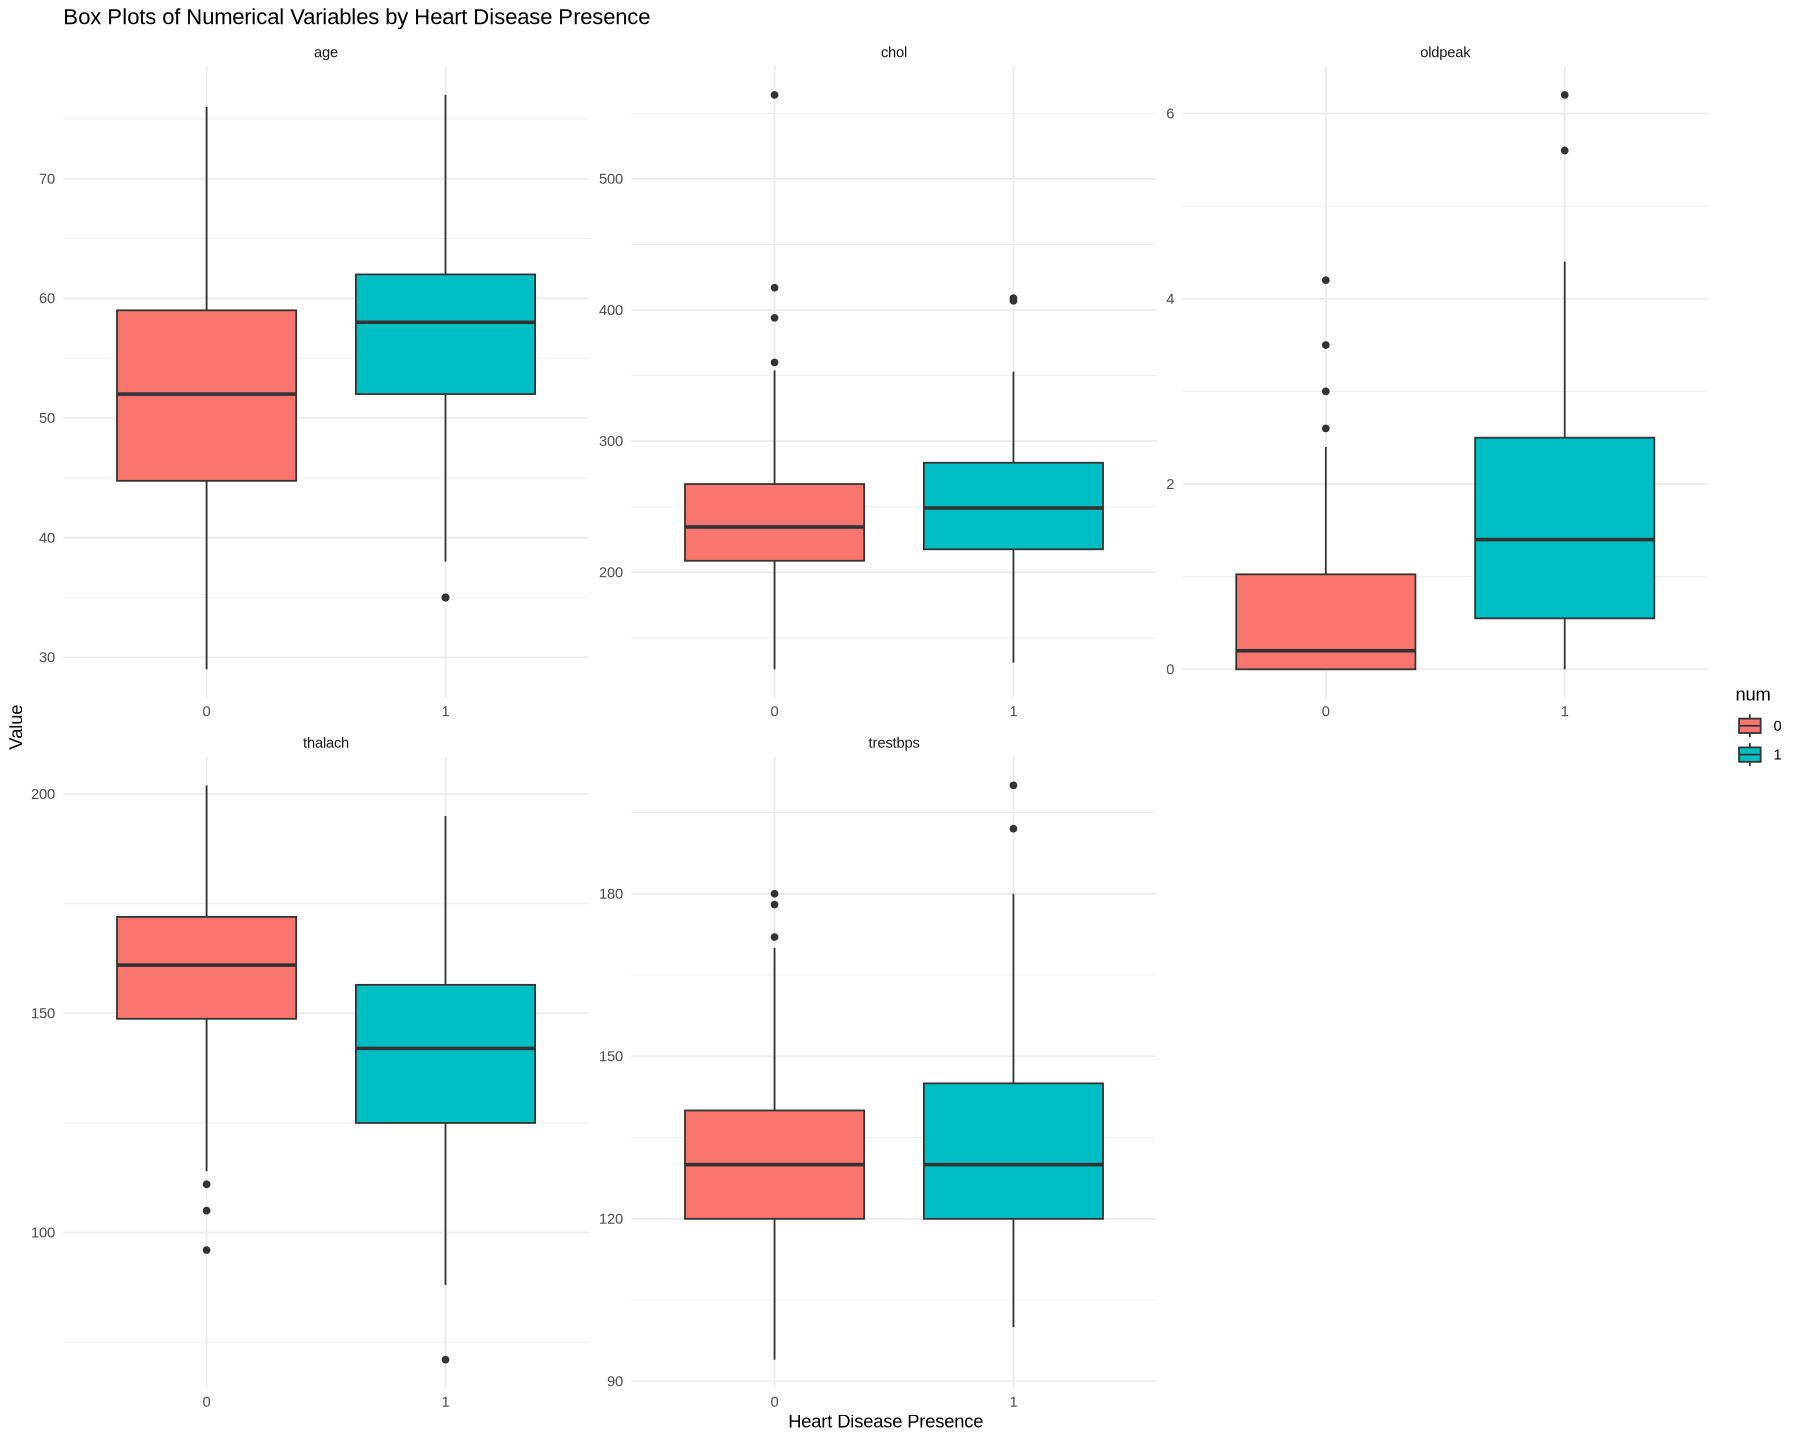

In [131]:
data %>%
  select(age, trestbps, chol, thalach, oldpeak, num) %>%
  gather(key = "Variable", value = "Value", -num) %>%
  ggplot(aes(x = num, y = Value, fill = num)) +
  geom_boxplot() +
  facet_wrap(~ Variable, scales = "free") +
  theme_minimal() +
  labs(title = "Box Plots of Numerical Variables by Heart Disease Presence", x = "Heart Disease Presence", y = "Value")

## 4. Methods and Plan

## Methods and Plan

### Proposed Method: Logistic Regression model and Backward Selection

To address the question of how various clinical and demographic factors affect the presence of heart disease, I propose using logistic regression. Logistic regression is a statistical method for analyzing datasets in which the response variable is binary. It models the probability of a binary outcome based on one or more predictor variables. I will also use backward selection to choose the  most significant predictors and understanding the relationship between the response and explanatory variables.

### Why is this Method Appropriate?

Logistic regression model is appropriate for several reasons:
- **Binary Outcome**: The response variable in this study is binary, indicating the presence or absence of heart disease. Logistic regression is specifically designed for binary outcomes.
- **Interpretability**: The coefficients in a logistic regression model are easily interpretable, as they represent the log odds of the outcome. This makes it straightforward to understand the impact of each predictor variable on the likelihood of heart disease.
- **Widely Used**: Logistic regression is a well-established method in medical and clinical research for predicting binary outcomes, making it a suitable choice for this study.

Backward is appropriate for several reasons:
- **Interpretability**：Improve the interpretability of the model by focusing on the most important predictors
- **Reduce noise**： Reduce the risk of including irrelevant variables that could introduce noise and confound the results

### Assumptions Required

For logistic regression to be appropriate, the following assumptions should be met:
- **Linearity of Logits**: The relationship between the predictor variables and the log odds of the outcome should be linear.
- **Independence**: The observations should be independent of each other.
- **No Multicollinearity**: There should be no perfect multicollinearity among the predictor variables.

### Potential Limitations or Weaknesses

While logistic regression is a powerful tool, it has some limitations:
- **Linearity Assumption**: Logistic regression assumes a linear relationship between the predictor variables and the log odds of the outcome. If this assumption is violated, the model may not perform well.
- **Handling of Missing Data**: Logistic regression requires complete data for all predictor variables. Handling missing data appropriately is crucial.
- **Outliers and High Leverage Points**: Outliers and high leverage points can disproportionately affect the model estimates, potentially leading to biased results.
- **Multicollinearity**: High correlations among predictor variables can inflate the standard errors of the coefficients, making it difficult to assess the individual effect of each predictor.